# Introduction

I wanted to try and explain why need both averages and something to measure variance to kids.

In [1]:
import random
from matplotlib import pyplot
import seaborn
import pandas
import numpy

Imagine a normal 6 sided die.

In [2]:
die = [1, 2, 3, 4, 5, 6]

If we only roll it a few times you can get pretty biased results.

[3, 4, 1]
Mean 2.6666666666666665


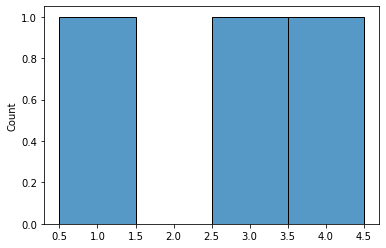

In [3]:
rolls = []
while len(rolls) < 3:
    rolls.append(random.choice(die))

print(rolls)
_ = seaborn.histplot(rolls, stat="count", discrete=True)
print("Mean", sum(rolls)/len(rolls))

But as you roll more often, here 100 times. You can start to see how the odds of getting any particular number tends toward being equal.

And you can start to see how the average of the rolls is 

$\frac{1 + 6}{2} = \frac{7}{2} = 3 \frac{1}{2}$

Mean 3.62


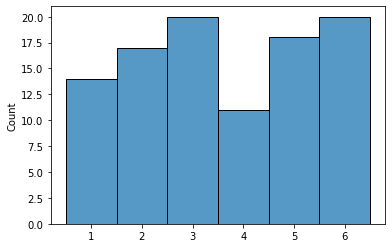

In [4]:
rolls = []
while len(rolls) < 100:
    rolls.append(random.choice(die))

_ = seaborn.histplot(rolls, stat="count", discrete=True)
print("Mean", sum(rolls)/len(rolls))

If we go up to 10,000 rolls, it's getting very evenly distributed.

Mean 3.498


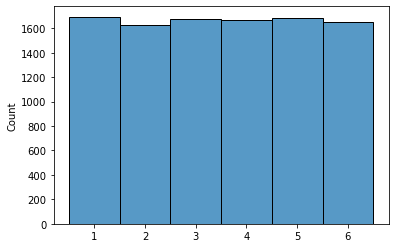

In [5]:
rolls = []
while len(rolls) < 10000:
    rolls.append(random.choice(die))

_ = seaborn.histplot(rolls, stat="count", discrete=True)
print("Mean", sum(rolls)/len(rolls))

But what if the die doesn't have an equal chance to for each number?

Let's try a more extreme die that only has 1s and 6s on it.

In [6]:
die_extreme = [1,1,1,6,6,6]

Mean 3.543


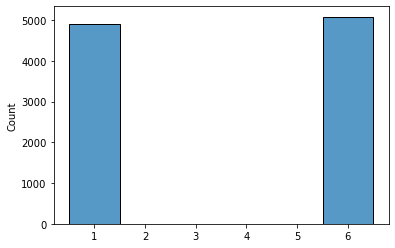

In [7]:
rolls_extreme = []
while len(rolls_extreme) < 10000:
    rolls_extreme.append(random.choice(die_extreme))

_ = seaborn.histplot(rolls_extreme, stat="count", discrete=True)
print("Mean", sum(rolls_extreme)/len(rolls_extreme))

Here you can see the range of values is much more extreme than the die with all the numbers 1 through 6. Now lets try a much more narrow case.

Mean 3.5067


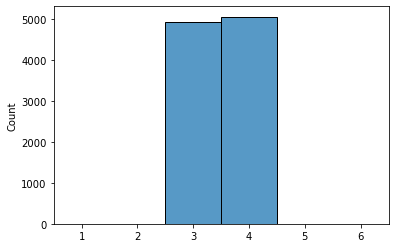

In [8]:
die_narrow = [3,3,3,4,4,4]

rolls_narrow = []
while len(rolls_narrow) < 10000:
    rolls_narrow.append(random.choice(die_narrow))

ax = seaborn.histplot(rolls_narrow, stat="count", discrete=True)
ax.set_xlim(0.5,6.5)
print("Mean", sum(rolls_narrow)/len(rolls_narrow))

In every case rolling each one of these dies thousands of times gives the same average of about 3 $\frac{1}{2}$  (3.5 = 3 $\frac{5}{10}$ = 3 $\frac{1}{2}$)

But their variance is different, using a standard deviation calculation. (numpy.std calculates the standard deviation, and numpy.round is rounding to make the numbers look easier to read.)

In [9]:
print("fair die mean", numpy.mean(rolls), "standard deviation", numpy.round(numpy.std(rolls), 2))
print("extreme die mean", numpy.mean(rolls_extreme), "standard deviation", numpy.round(numpy.std(rolls_extreme), 2))
print("narrow die mean", numpy.mean(rolls_narrow), "standard deviation", numpy.round(numpy.std(rolls_narrow), 2))

fair die mean 3.498 standard deviation 1.71
extreme die mean 3.543 standard deviation 2.5
narrow die mean 3.5067 standard deviation 0.5


You can see how the mean for all 3 dies is about the same, but the standard deviations are quite different for each die.